# 0. SETUP

In [1]:
!pip install fastai==2.5.1

In [2]:
#hide
from fastai.vision.all import *

In [3]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 11.2 MB/s 
     |████████████████████████████████| 1.2 MB 35.8 MB/s 
     |████████████████████████████████| 46 kB 3.4 MB/s 
     |████████████████████████████████| 51 kB 330 kB/s 
Mounted at /content/gdrive


In [5]:
from fastbook import *

# 1. GET DATA

In [6]:
categories = 'Homer Simpson', 'Marge Simpson', 'Bart Simpson', 'Lisa Simpson'
# Choisis tes catégories

path = Path('cats')
if not path.exists():
  path.mkdir()
  for o in categories:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    urls = search_images_ddg(f' {o} ', max_images=100)
    download_images(dest, urls=urls)

In [7]:
fns = get_image_files(path)
failed = verify_images(fns)
failed.map(Path.unlink);

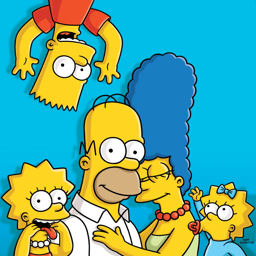

In [11]:
download_url(urls[99], 'images/im.jpg')
im = Image.open('images/im.jpg')
im.thumbnail((256,256))
im

In [12]:
db = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [13]:
dls = db.dataloaders(path)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


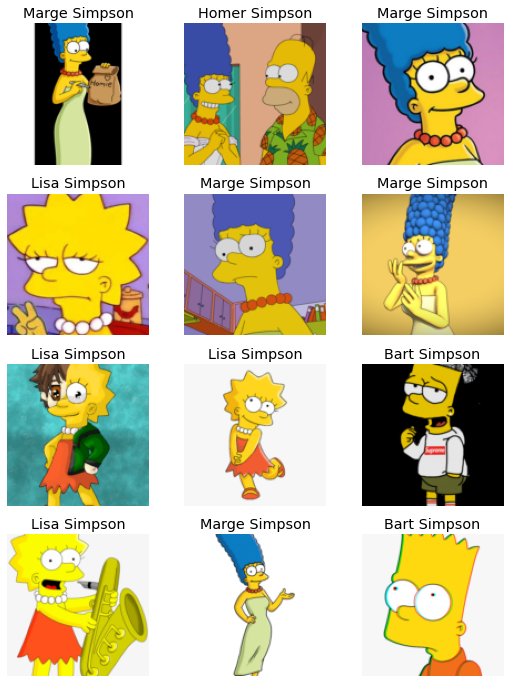

In [14]:
dls.valid.show_batch(max_n=12, nrows=4) 

# 2. TRAIN MODEL

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=error_rate)
learn.fine_tune(epochs=10)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


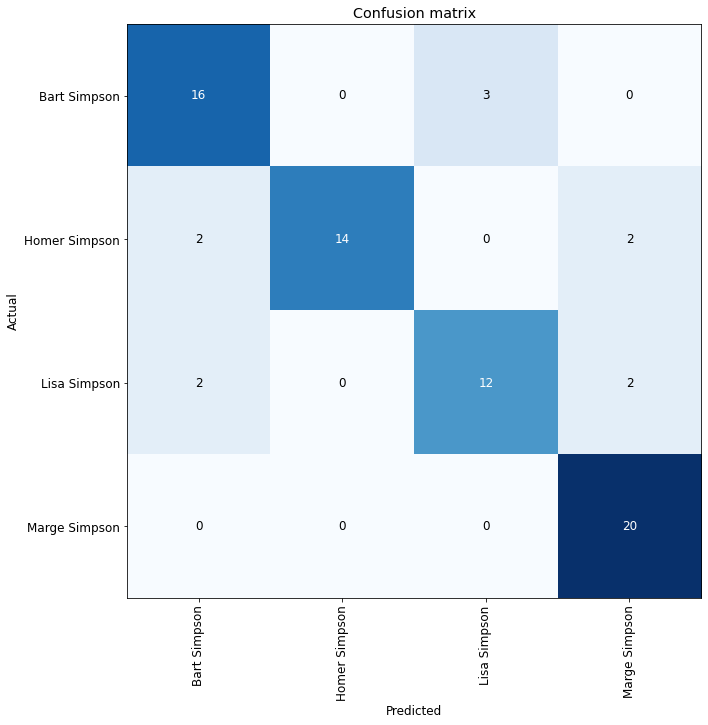

In [16]:
from IPython.core.pylabtools import figsize 
interp = ClassificationInterpretation.from_learner(learn) 
interp.plot_confusion_matrix(figsize=(10,10))

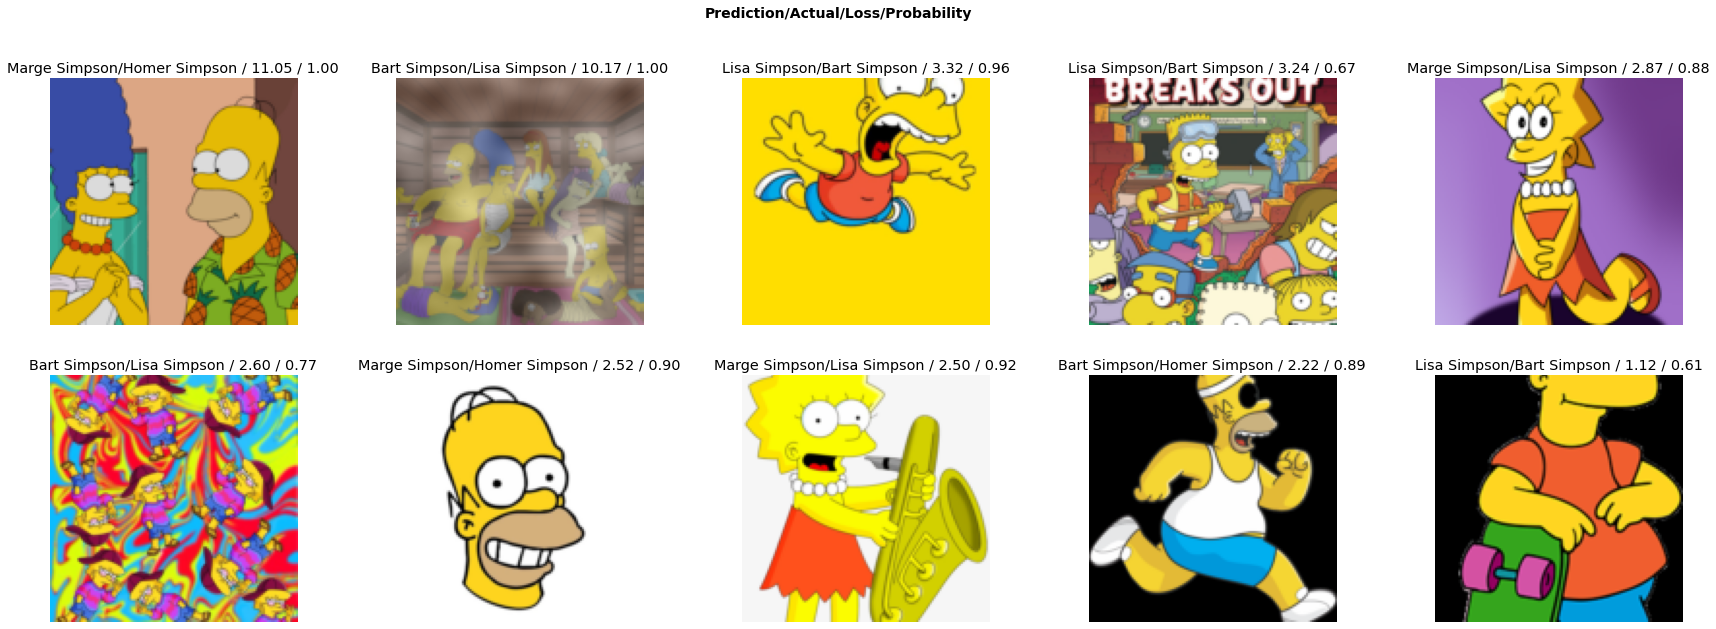

In [19]:
interp.plot_top_losses(10, nrows=2, figsize=(30,10))

## Exercices to try: 

Train your models for more epochs, what happens ? (★☆☆)

Change the batch size, what happens ? (★☆☆)



Change the image size, what happens ? (★★☆)

Go to the source code of `nn.py` and get the `MLPModel` code. Remove the non-linearities (ReLU) from the `forward` method. What happens if you train the network now ? (★★☆)

Do the same for the `CNNModel` (★★☆)

Do you see a relation between the number of parameters and the final accuracy ? (★☆☆)

Try to add more layers to the networks and to see what happens (★★★)